<a href="https://colab.research.google.com/github/ssjsmith750/sms_spam_Detection/blob/main/SMS_Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [120]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap
from sklearn import metrics

In [5]:
from google.colab import files

uploaded = files.upload()


Saving archive(1).zip to archive(1) (1).zip


In [8]:
import zipfile
import io

# Replace 'archive(1) (1).zip' with the correct key
zip_file_key = 'archive(1) (1).zip'

# Replace 'destination_folder' with the desired destination folder
destination_folder = 'destination_folder'

with zipfile.ZipFile(io.BytesIO(uploaded[zip_file_key]), 'r') as zip_ref:
    zip_ref.extractall(destination_folder)


In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [78]:
import pandas as pd

# Replace 'spam.csv' with the actual CSV file name
csv_file_path = '/content/destination_folder/spam.csv'

# Try reading the CSV file with different encodings
try:
    df = pd.read_csv(csv_file_path, encoding='utf-8')
except UnicodeDecodeError:
    # If 'utf-8' fails, try 'latin-1' or 'ISO-8859-1'
    df = pd.read_csv(csv_file_path, encoding='latin-1')

# Display the DataFrame
print(df.head())


     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [79]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [81]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [82]:
columns_to_delete = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']


df = df.drop(columns=columns_to_delete)

print(df.head())


     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


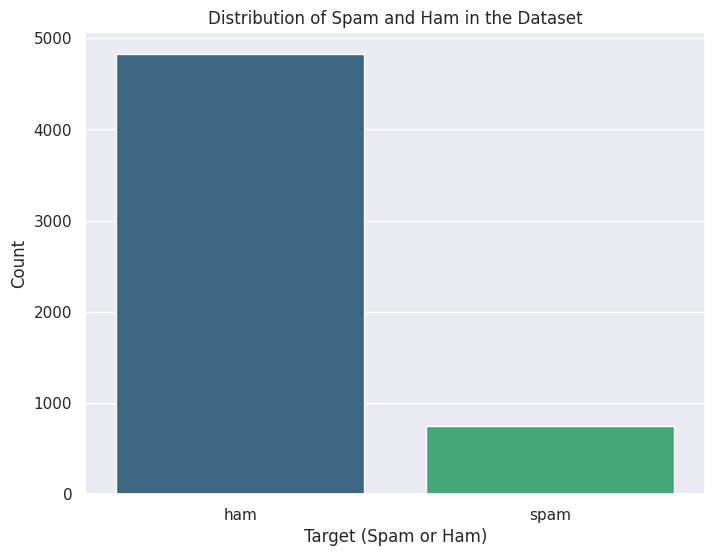

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the 'Target' column
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='Target', data=df, palette='viridis')

plt.title('Distribution of Spam and Ham in the Dataset')
plt.xlabel('Target (Spam or Ham)')
plt.ylabel('Count')

plt.show()


#Rename the column#

In [83]:
df.rename(columns={'v1':'Target','v2':'feature'},inplace=True)
df.head()

,Target,feature
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [84]:
# Review Frquency Count
vc_df = pd.DataFrame(df['Target'].value_counts()).reset_index()
vc_df.columns = ['Target', 'Count']
vc_df['Target'] = vc_df['Target'].map({1 : 'positive', 0: 'negative'})
vc_df

,Target,Count
0,NaN,4825
1,NaN,747


In [85]:
df.head()

,Target,feature
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#Pre-processing the data#

Some common Problems:
1.Remove Punctuation
2.Replace short words
3.Making text lower case
4.Remove stopwords
5.Lemmatization

#### Removing punctuation (.!<>{}’,”(/)-\)

In [86]:
df['feature']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: feature, Length: 5572, dtype: object

###Replacing all Pantuation

In [87]:
import pandas as pd
import re

# Assuming 'df' is your DataFrame and 'column_name' is the name of the column containing text data
text_data = df['feature']

# Function to clean text
def clean_text(text):
    # Remove special characters, punctuation, and numbers
    text = re.sub('[^A-Za-z\s]', '', text)
    return text

# Apply the cleaning function to the entire column
df['cleaned_text'] = text_data.apply(clean_text)

# Display the modified DataFrame
print(df[['feature', 'cleaned_text']])


                                                feature  \
0     Go until jurong point, crazy.. Available only ...   
1                         Ok lar... Joking wif u oni...   
2     Free entry in 2 a wkly comp to win FA Cup fina...   
3     U dun say so early hor... U c already then say...   
4     Nah I don't think he goes to usf, he lives aro...   
...                                                 ...   
5567  This is the 2nd time we have tried 2 contact u...   
5568              Will Ì_ b going to esplanade fr home?   
5569  Pity, * was in mood for that. So...any other s...   
5570  The guy did some bitching but I acted like i'd...   
5571                         Rofl. Its true to its name   

                                           cleaned_text  
0     Go until jurong point crazy Available only in ...  
1                               Ok lar Joking wif u oni  
2     Free entry in  a wkly comp to win FA Cup final...  
3           U dun say so early hor U c already then say  
4

### Replacing all Text to lower case

In [88]:
import pandas as pd

df['cleaned_text'] = df['cleaned_text'].str.lower()

# Display the modified DataFrame
print(df['cleaned_text'])


0       go until jurong point crazy available only in ...
1                                 ok lar joking wif u oni
2       free entry in  a wkly comp to win fa cup final...
3             u dun say so early hor u c already then say
4       nah i dont think he goes to usf he lives aroun...
                              ...                        
5567    this is the nd time we have tried  contact u u...
5568                   will  b going to esplanade fr home
5569    pity  was in mood for that soany other suggest...
5570    the guy did some bitching but i acted like id ...
5571                            rofl its true to its name
Name: cleaned_text, Length: 5572, dtype: object


### Cancelling all the extra spaces

In [89]:
import pandas as pd

df['cleaned_text'] = df['cleaned_text'].str.replace(r'\s+', ' ', regex=True)

# Display the modified DataFrame
print(df['cleaned_text'])


0       go until jurong point crazy available only in ...
1                                 ok lar joking wif u oni
2       free entry in a wkly comp to win fa cup final ...
3             u dun say so early hor u c already then say
4       nah i dont think he goes to usf he lives aroun...
                              ...                        
5567    this is the nd time we have tried contact u u ...
5568                    will b going to esplanade fr home
5569    pity was in mood for that soany other suggestions
5570    the guy did some bitching but i acted like id ...
5571                            rofl its true to its name
Name: cleaned_text, Length: 5572, dtype: object


# **Tokanization**

In [91]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
import re

# Assuming 'df' is your DataFrame and 'column_name' is the name of the column containing text data
nltk.download('punkt')  # Download the Punkt tokenizer models if not already downloaded

# Function to clean and tokenize text
def clean_and_tokenize(text):
    if isinstance(text, str) and text.strip():  # Check if the value is a non-empty string
        # Remove special characters, punctuation, and numbers
        cleaned_text = re.sub('[^A-Za-z\s]', '', text)
        # Tokenize the cleaned text
        return ' '.join(word_tokenize(cleaned_text))
    else:
        return ''  # Return an empty string for non-string values or empty strings

# Apply the cleaning and tokenization function to the entire column
df['cleaned_text'] = df['feature'].apply(clean_and_tokenize)

# Display the modified DataFrame
print(df[['feature', 'cleaned_text']])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                                feature  \
0     Go until jurong point, crazy.. Available only ...   
1                         Ok lar... Joking wif u oni...   
2     Free entry in 2 a wkly comp to win FA Cup fina...   
3     U dun say so early hor... U c already then say...   
4     Nah I don't think he goes to usf, he lives aro...   
...                                                 ...   
5567  This is the 2nd time we have tried 2 contact u...   
5568              Will Ì_ b going to esplanade fr home?   
5569  Pity, * was in mood for that. So...any other s...   
5570  The guy did some bitching but I acted like i'd...   
5571                         Rofl. Its true to its name   

                                           cleaned_text  
0     Go until jurong point crazy Available only in ...  
1                               Ok lar Joking wif u oni  
2     Free entry in a wkly comp to win FA Cup final ...  
3           U dun say so early hor U c already then say  
4

#**Removing Stop words**

In [93]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Assuming 'df' is your DataFrame and 'review_processed' is the name of the column you want to process
nltk.download('punkt')  # Download the Punkt tokenizer models if not already downloaded
nltk.download('stopwords')  # Download the stopwords dataset if not already downloaded

stop_words = set(stopwords.words('english'))

def tokenize_and_remove_stopwords(text):
    if isinstance(text, str):  # Check if the value is a string
        return [word for word in word_tokenize(text) if word.lower() not in stop_words]
    else:
        return []  # Return an empty list for non-string values

df['cleaned_text'] = df['cleaned_text'].apply(tokenize_and_remove_stopwords)

# Display the modified DataFrame
print(df['cleaned_text'])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0       [Go, jurong, point, crazy, Available, bugis, n...
1                          [Ok, lar, Joking, wif, u, oni]
2       [Free, entry, wkly, comp, win, FA, Cup, final,...
3           [U, dun, say, early, hor, U, c, already, say]
4       [Nah, dont, think, goes, usf, lives, around, t...
                              ...                        
5567    [nd, time, tried, contact, u, U, Pound, prize,...
5568                      [b, going, esplanade, fr, home]
5569                     [Pity, mood, Soany, suggestions]
5570    [guy, bitching, acted, like, id, interested, b...
5571                                   [Rofl, true, name]
Name: cleaned_text, Length: 5572, dtype: object


#**Stemming**

In [95]:
import pandas as pd
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Assuming 'df' is your DataFrame and 'review_processed' is the name of the column you want to process
nltk.download('punkt')  # Download the Punkt tokenizer models if not already downloaded

stemmer = PorterStemmer()

def stem_text(text):
    if isinstance(text, str):  # Check if the value is a string
        return ' '.join([stemmer.stem(word) for word in word_tokenize(text)])
    else:
        return text  # Return the non-string value as it is

df['cleaned_text'] = df['cleaned_text'].apply(stem_text)

# Display the modified DataFrame
print(df['cleaned_text'])


0       [Go, jurong, point, crazy, Available, bugis, n...
1                          [Ok, lar, Joking, wif, u, oni]
2       [Free, entry, wkly, comp, win, FA, Cup, final,...
3           [U, dun, say, early, hor, U, c, already, say]
4       [Nah, dont, think, goes, usf, lives, around, t...
                              ...                        
5567    [nd, time, tried, contact, u, U, Pound, prize,...
5568                      [b, going, esplanade, fr, home]
5569                     [Pity, mood, Soany, suggestions]
5570    [guy, bitching, acted, like, id, interested, b...
5571                                   [Rofl, true, name]
Name: cleaned_text, Length: 5572, dtype: object


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [97]:
import pandas as pd
import spacy

# Assuming 'df' is your DataFrame and 'review_processed' is the name of the column you want to process
spacy_nlp = spacy.load("en_core_web_sm")

def lemmatize_text(text):
    if isinstance(text, list):  # Check if the value is a list
        return ' '.join([token.lemma_ for token in spacy_nlp(' '.join(text))])
    elif isinstance(text, str):  # Check if the value is a string
        return ' '.join([token.lemma_ for token in spacy_nlp(text)])
    else:
        return text  # Return the non-list and non-string value as it is

df['cleaned_text'] = df['cleaned_text'].apply(lemmatize_text)

# Display the modified DataFrame
print(df['cleaned_text'])


0       go jurong point crazy Available bugis n great ...
1                                 ok lar Joking wif u oni
2       free entry wkly comp win FA Cup final tkts st ...
3                     u dun say early hor U c already say
4              Nah do not think go usf live around though
                              ...                        
5567    nd time try contact u U Pound prize claim easy...
5568                               b go esplanade fr home
5569                           pity mood soany suggestion
5570    guy bitching act like i d interested buy somet...
5571                                       rofl true name
Name: cleaned_text, Length: 5572, dtype: object


#** Feature Engineering**

In [99]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Assuming 'df' is your DataFrame and 'column_name' is the name of the column containing text data
text_data = df['cleaned_text']

# Check for NaN or empty strings in the text data
text_data = text_data.dropna().astype(str).apply(lambda x: x.strip())

if text_data.empty:
    print("No valid text data to process.")
else:
    # Bag of Words (BoW)
    count_vectorizer = CountVectorizer()
    bow_matrix = count_vectorizer.fit_transform(text_data)

    # TF-IDF
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)

    # Convert BoW and TF-IDF matrices to DataFrames for easier inspection
    bow_df = pd.DataFrame(bow_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

    # Display the BoW DataFrame
    print("Bag of Words (BoW) DataFrame:")
    print(bow_df)

    # Display the TF-IDF DataFrame
    print("\nTF-IDF DataFrame:")
    print(tfidf_df)


Bag of Words (BoW) DataFrame:
      aa  aah  aaniye  aaooooright  aathilove  aathiwhere  ab  abbey  abdomen  \
0      0    0       0            0          0           0   0      0        0   
1      0    0       0            0          0           0   0      0        0   
2      0    0       0            0          0           0   0      0        0   
3      0    0       0            0          0           0   0      0        0   
4      0    0       0            0          0           0   0      0        0   
...   ..  ...     ...          ...        ...         ...  ..    ...      ...   
5567   0    0       0            0          0           0   0      0        0   
5568   0    0       0            0          0           0   0      0        0   
5569   0    0       0            0          0           0   0      0        0   
5570   0    0       0            0          0           0   0      0        0   
5571   0    0       0            0          0           0   0      0        0  

In [100]:
df['cleaned_text'].unique()

array(['go jurong point crazy Available bugis n great world la e buffet Cine get amore wat',
       'ok lar Joking wif u oni',
       'free entry wkly comp win FA Cup final tkts st May Text FA receive entry questionstd txt ratetcs apply over',
       ..., 'pity mood soany suggestion',
       'guy bitching act like i d interested buy something else next week give we free',
       'rofl true name'], dtype=object)

#**Spliting the data**

In [102]:
from sklearn.model_selection import train_test_split

X = df['cleaned_text']
y = df['Target']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (4457,) (4457,)
Testing set shape: (1115,) (1115,)


#**Model Selection**

In [103]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report

# Create a pipeline with a CountVectorizer and a Multinomial Naive Bayes classifier
model = make_pipeline(CountVectorizer(), MultinomialNB())

# Train the model on the training set
model.fit(X_train, y_train)

# Predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display the results
print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)


Accuracy: 0.9829596412556054

Classification Report:
               precision    recall  f1-score   support

         ham       0.99      0.99      0.99       965
        spam       0.96      0.91      0.93       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



#** Training the Data**

In [104]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# Create a pipeline with a TF-IDF Vectorizer and a Multinomial Naive Bayes classifier
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Train the model on the entire dataset
model.fit(X, y)


Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [105]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create a pipeline with TfidfVectorizer and MultinomialNB
text_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', MultinomialNB())
])

# Train the model on the training set
text_clf.fit(X_train, y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('classifier', MultinomialNB())])

In [106]:
# Predictions on the testing set
y_pred = text_clf.predict(X_test)


In [107]:
import joblib  # To save and load the trained model

# Assuming you have saved your model during training
joblib.dump(model, 'sms_spam_model.pkl')

# Load the model
loaded_model = joblib.load('sms_spam_model.pkl')


In [113]:
new_messages = ["You win a prize", "Today is the deadline for project submission"]
new_predictions = model.predict(new_messages)
print(new_predictions)

['spam' 'ham']


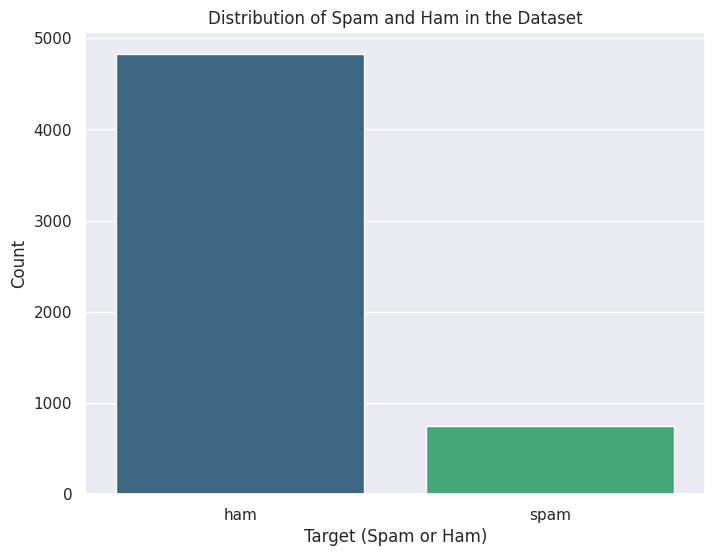

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the 'Target' column
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='Target', data=df, palette='viridis')

plt.title('Distribution of Spam and Ham in the Dataset')
plt.xlabel('Target (Spam or Ham)')
plt.ylabel('Count')

plt.show()
